In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 일반적인 비선형방정식의 그래프를 그리는 함수

def plotXY(xp, yp, title = "XY 차트", strFn = None, locFn = None,
    strRoot = None, root = 0.0):
    
    # 그래프에 한글 사용
    mpl.rc('font', family='HYGraphic-Medium')
    mpl.rc('axes', unicode_minus=False)
    
    # XY-차트
    plt.plot(xp, yp)
    plt.title(title)
    plt.grid(True)
    
    # 함수 나타내기
    if strFn != None:
        ax = plt.gca()
        plt.text(0.05, 0.1, strFn, ha='left',
            va='center', transform = ax.transAxes)
        
    # 해의 값과 위치를 주석으로 표시
    if strRoot != None:
        root = strRoot[0]
        it = strRoot[1]
        plt.plot(root, 0.0, 'ro')
        strRoot = '해= {0:8.5f}, 반복횟수 = {1:3d}'.format(root, it)        
        plt.annotate(strRoot, xy=(root,0), xytext=(root, 0.5),
            arrowprops=dict(facecolor='black',shrink=0.05,
            width=1))
    plt.show()
    
# 비선형방정식의 해가 있는 구간을 결정하는 함수
def rangeRoots(fn, xl, xu, space = 1.0):
    rng = []
    n = (int) ((xu - xl) / space)
    for i in range(n-1):
        a = xl + space * i
        b = a + space
        if fn(a) * fn(b) < 0.0:
            rng.append([a, b])
    return rng

In [ ]:
# 비선형방정식의 풀이 클래스

import sys
import math
import numpy as np

## 증가탐색법 모듈
#--------------------------------------------------------
''' xs, iter = incSearch(f, a, b, tol).
    범위 (a,b)에서 해가 들어있는 범위가 tol 이하가 될 때까지
    f(x) = 0를 근사하는 해를 찾는다.
    반환값은 해의 근사값 xs와 반복계산횟수 iter이다.
'''
def incSearch(fn, x1, x2, tol=1.0e-9):
    iter = 0
    digit = int(-math.log10(tol)) # 소수점 이하 자릿수
    
    for i in range(digit):
        dx = (x2 - x1) / 10.0
        # [x1, x2]는 현재 좁혀진 해의 범위
        x1, x2, it = bracketing(fn, x1, x2, dx)
        iter += it
        if (x1 == None):
            return None
    xs = (x1 + x2) / 2.0
    
    return [xs, iter]

# 해의 범위 좁히기. [a:b] -> [x1:x2]
def bracketing(fn, a, b, dx):
    x1 = a
    f1 = fn(a)
    x2 = a + dx
    f2 = fn(x2)
    it = 0
    # dx만큼 건너뛰면서 부호 바뀌는 곳 찾기
    while np.sign(f1) == np.sign(f2):
        if x1 >= b:
            return None, None, None
        x1 = x2
        f1 = f2
        x2 = x1 + dx
        f2 = fn(x2)
        it += 1
    else:
        return x1, x2, it



## 이분법 모듈
#--------------------------------------------------------
''' root = bisection(f, a, b, tol=1.0e-9, switch=0).
    f(x) = 0의 해를 이분법으로 찾는다.
    해는 반드시 [a, b] 안에 있어야 한다.
'''
def bisection(fn, x1, x2, tol=1.0e-9, switch=0):
    iter = 0
    f1 = fn(x1)
    if (f1 == 0.0): return [x1, iter]
    f2 = fn(x2)
    if (f2 == 0.0): return [x2, iter]

    if (np.sign(f1) == np.sign(f2)):
        print("근이 이 범위 안에 없음")
        exit()

    # 대략의 계산횟수
    n = int(math.ceil(math.log(abs(x2 - x1)/tol)
                      / math.log(2.0)))
    
    xOld = 0.0
    for i in range(n):
        x3 = 0.5 * (x1 + x2)
        f3 = fn(x3)
        if (switch == 1): # 극값 검토
            if (abs(f3) > abs(f1)) and (abs(f3) > abs(f2)):
                return [None, None]
        iter += 1
        if abs(x3 - xOld) <= tol:
            return [(x1+x2)/2.0, iter]
        xOld = x3
        if np.sign(f2) != np.sign(f3):
            x1 = x3
            f1 = f3
        else:
            x2 = x3
            f2 = f3
    else:
        print('반복계산횟수 {0:3d} 안에 수렴하지 않음'.format(n))
        return [None, None]

## Ridders법 모듈
#--------------------------------------------------------
''' x, iter = Ridders(fn,a,b,tol=1.0e-9).
    Ridders법으로 fn(x) = 0의 근찾기
    근은 <a:b>안에 있어야 한다.
'''
def Ridders(fn, a, b, tol=1.0e-9):
    iter = 0
    fa = fn(a)
    if fa == 0.0:
        return a
    fb = fn(b)
    if fb == 0.0:
        return b
    if np.sign(fa) == np.sign(fb):
        print('해의 범위가 좁혀지지 않음.')
        sys.exit()
    
    for i in range(30):
        # Ridders 법으로 개선된 해 x를 계산
        c = 0.5 * (a + b)
        fc = fn(c)
        s = math.sqrt(fc**2 - fa*fb)
        if s == 0.0:
            return None
        dx = (c - a)*fc/s
        if (fa - fb) < 0.0:
            dx = -dx
        x = c + dx
        fx = fn(x)
        iter += 1
        # 수렴성 검토
        if i > 0:
            if abs(x - xOld) < tol*max(abs(x),1.0):
                return x, iter
        xOld = x
        # 가능한한 근의 범위를 좁히기
        if np.sign(fc) == np.sign(fx):
            if np.sign(fa) != np.sign(fx):
                b = x
                fb = fx
            else:
                a = x
                fa = fx
        else: # fc와 fx의 부호가 다름
            a = c
            b = x
            fa = fc
            fb = fx
    else:
        print('반복횟수 초과')
        return None, None

## NewtonRaphson 모듈
'''
    x, it = NewtonRaphson0(fn, df, x0, tol=1.0e-9).
    단순한 Newton-Raphson법으로 fn(x) = 0의 근을 찾는다.
    이때 초기값은 x0이다.
    이용자는 함수 fn(x)와 그의 도함수 df(x)를 제공해야 한다.
'''
def NewtonRaphson0(fn, df, x0, tol=1.0e-9):
    iter = 0
    x = x0
    for i in range(30):
        fx = fn(x)
        if fx == 0.0:
            return x, iter
        dfx = df(x)

        dx = - fx / dfx
        x = x + dx
        iter += 1

        # 수렴성 검토
        if abs(dx) < tol:
            return x, iter
    else:
        print('Newton-Raphson에서 반복횟수 초과')
        return None, None
    
# 이중근을 고려한 NewtonRaphson 함수
''' x, it = NewtonRaphson(f, df, x0, m=1, tol=1.0e-9).
    단순한 Newton-Raphson법으로 f(x) = 0의 근을 찾는다.
    이때 초기값은 x0이다. m은 다중근을 나타낸다.
    이용자는 함수 f(x)와 그의 도함수 df(x)를 제공해야 한다.
'''
def NewtonRaphson(f, df, x0, m=1, tol=1.0e-9):
    iter = 0
    x = x0
    for i in range(30):
        fx = f(x)
        if fx == 0.0:
            return x, iter
        
        dfx = df(x)
        
        # 0으로 나누면, x를 범위 밖으로 보냄
        try:
            dx = -m * fx / dfx
        except ZeroDivisionError:
            print("오류: 미분값이 0임")
            sys.exit()
        x = x + dx
        iter += 1
        # 수렴성 검토
        if abs(dx) < tol:
            return x, iter
    else:
        print('Newton-Raphson에서 반복횟수 초과')
        return None, None

# 이진법과 결합한 NewtonRaphsonBS()
'''
    x, iter = NewtonRaphsonBS(fn,df,a,b,tol=1.0e-9).
    Newton-Raphson법과 이분법을 조합하여 fn(x) = 0의 근을 찾는다.
    근은 <a:b>의 범위안에 있어야 한다.
    이용자는 함수 fn(x)와 그의 도함수 df(x)를 제공해야 한다.
'''
def NewtonRaphsonBS(fn, df, a, b, m = 1, tol=1.0e-9):
    x = 0.5 * (a + b)
    iter = 0
    for i in range(30):
        fx = fn(x)
        if fx == 0.0:
            return x, iter
        
        # Newton-Raphson 단계 시도
        dfx = df(x)
        
        # 0으로 나누면, x를 범위 밖으로 보냄
        try:
            dx = - m * fx / dfx
        except ZeroDivisionError:
            dx = b - a
        x = x + dx
        iter += 1
        
        # 만일 결과가 범위 (a,b) 밖이면 이분법 이용
        if (b - x)*(x - a) < 0.0:
            dx = 0.5*(b - a)
            x = a + dx
        
        # 수렴성 검토
        if abs(dx) < tol:
            return x, iter
    else:
        print('Newton-Raphson에서 반복횟수 초과')
        return None, None



In [ ]:
# 비선형방정식의 풀이 클래스 

import sys 
import math
import numpy as np

## 증가탐색법 모듈 

def incSearch(fn, x1, x2, tol=1.0E-9):
  iter = 0    # 반복횟수
  digit = int(-math.log10(tol))

  for i in range(digit):
    dx = (x2-x1) / 10.0
    x1, x2, it = bracketing(fn, x1, x2, dx)
    iter += it 
    if x1 == None :  return None
    xs = (x1 + x2) / 2.0
  
  return [xs, iter]
  def bracketing(fn, a, b, dx):
    x1 = a;   f1 = fn(a);    x2 = a + dx;  f2 = fn(x2);   it = 0;
    while np.sign(f1) == np.sign(f2) :    # sign이 부호인가
      if x1 >= b :    # 범위위 a,b 내에서 dx만큼 계속 증분/ None하고 범위 옮기기 
        return None, None, None
      x1 = x2
      f1 = f2
      x2 = x1 + dx
      f2 = fn(x2)
      it += 1
    else :
        return x1, x2, it


In [ ]:

def fn(x):
  a = (x-0.5)**2 + 0.5
  b = (x-1.5)**2 + 1.0
  return 1.0/a - 1/b - 0.5

if __name__ == '__main--' :
  x1 = 0.5
  x2 = 1.5
  tol = 1.0E-5
  
  lstRoot = incSearch(fn, x1, x2, tol)
  if lstRoot == None :
    print('해를를 찾을을 수 없음') 
    sys.exit()

    # 그래프그리기
    xin = -5.0
    max = 5.01
    xp = np.arange(xmin, xmax, 0.01)
    yp = fn(xp) 

    title = '증가탐색법'
    strFn = 

SyntaxError: ignored

In [ ]:
# 이분법 모듈

def bisection(fn, x1, x2, tol=1.0E-9, switch=0):    # tol은 충분히 작은은 값(입실)
  iter = 0
  f1 = fn(x1)
  if f1 == 0 : return [x1, iter]
  f2 = fn(x2)
  if f2 == 0 : return [x2, iter]

  if np.sign(f1) == np.sign(f2):
    print('근이 없음')
    exit()

  # 계산횟수
  n = int(math.ceil(math.log(abs(x2-x1)/tol) / math.log(2.0)))
  
  xOld = 0.0
  for i in range(n):
    x3 = (x1+x2) / 2
    f3 = fn(x3)
    if switch == 1 :  # 극값 검토/ 이거 뭐지?? 모르는거 이렇게 적어놓고... 결국엔 다 해결해야 나한테 남는거다
      if abs(f3) > abs(f1) and abs(f3) > abs(f2):
        return [None, None]
    iter += 1
    if abs(x3 - xOld) <= tol :    # 중간과 0이 e보다 작아지면
      return [(x1+x2)/2.0, iter]
    xOld = x3
    if np.sign(f2) != np.sign(f3):
      x1 = x3
      f1 = f3
    else : 
      x2 = x3
      f2 = f3
# 아는 것보다 모르는걸 하는게 더 중요 
  else : 
    print('반복계산횟수 {0:3d} 안에 수렴하지 않음' .format(n))
    return [None, None]


SyntaxError: ignored

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 일반적인 비선형방정식의 그래프를 그리는 함수

def plotXY(xp, yp, title = "XY 차트", strFn = None, locFn = None,
    strRoot = None, root = 0.0):
    
    # 그래프에 한글 사용
    mpl.rc('font', family='HYGraphic-Medium')
    mpl.rc('axes', unicode_minus=False)
    
    # XY-차트
    plt.plot(xp, yp)
    plt.title(title)
    plt.grid(True)
    
    # 함수 나타내기
    if strFn != None:
        ax = plt.gca()
        plt.text(0.05, 0.1, strFn, ha='left',
            va='center', transform = ax.transAxes)
        
    # 해의 값과 위치를 주석으로 표시
    if strRoot != None:
        root = strRoot[0]
        it = strRoot[1]
        plt.plot(root, 0.0, 'ro')
        strRoot = '해= {0:8.5f}, 반복횟수 = {1:3d}'.format(root, it)        
        plt.annotate(strRoot, xy=(root,0), xytext=(root, 0.5),
            arrowprops=dict(facecolor='black',shrink=0.05,
            width=1))
    plt.show()
    
import numpy as np
import math

# Ridders법 

def Ridders(fn, a, b, tol=1.0E-9):
  iter = 0
  fa = fn(a)
  fb = fn(b)
  if fa == 0.0 :
    return a
  if fb == 0.0 :
    return b
  if np.sign(fa) == np.sign(fb):
    print('해의 범위가 좁혀지지 않음')
    sys.exit()    # 내가 코드 짤 줄 알아야하니까 완성된거 보는건 아냐/ 내가 직접 해보고 모를 때 참고하는 용도
    
  for i in range(30):
    c = (a+b) / 2
    fc = fn(c)
    s = math.sqrt(fc**2 - fa*fb)
    if s == 0 :
      return None   # 왜?
    dx = (c-a) * fc / s   # 식 4.15 2항
    if (fa-fb) < 0 :    # fb가 더 크면 dx 부호 반대/ 그래서 식에서 플마임
      dx = -dx
    
    x = c + dx
    fx = fn(x)
    iter += 1
    
    # 수렴성 검토
    if i > 0 :    # 계속 반복하란 뜻
      if abs(x- xOld) < tol * max(abs(x), 1.0):   # 이해 안됨..
        return x, iter
    xOld = x

    if np.sign(fc) == np.sign(fx):    # 이제 윤활 끝
      if np.sign(fa) != np.sign(fx):   #b를 x4로로 참조
        b = x
        fb = fx
      else : 
        a = x
        fa = fx
    else : 
      a = c
      fa = fc
      b = x
      fb = fx
  else : 
    print('반복횟수수 초과')
    return None, None   

      


findfont: Font family ['HYGraphic-Medium'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['HYGraphic-Medium'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54943 missing from current font.
  font.set_text(

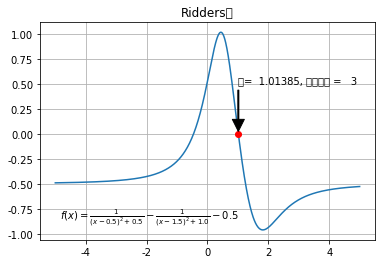

In [ ]:
# 예제 4.7 Ridders법에 의한 비선형 방정식의 근찾기

import numpy as np

def fn(x):
    a = (x - 0.5)**2 + 0.5
    b = (x - 1.5)**2 + 1.0
    return 1.0/a - 1.0/ b - 0.5

if __name__ == '__main__':  
    # 주어진 자료
    x1 = 0.5
    x2 = 1.5
    tol = 1.0e-5

    # 해 찾기
    lstRoot = Ridders(fn, x1, x2, tol)

    # 그래프 그리기
    xmin = -5.0
    xmax = 5.01
    xp = np.arange(xmin, xmax, 0.01)
    yp = fn(xp)

    title = "Ridders법"
    strFn = r'$\ f(x) = \frac {1}{\left(x-0.5\right)^2+0.5}'\
            r'-\frac {1}{\left(x-1.5\right)^2+1.0} -0.5$'

    # 그리기 함수 호출
    plotXY(xp, yp, title, strFn = strFn, strRoot = lstRoot)


In [ ]:
def NewtonRaphson0(fn, df, x0, tol=1.0E-9):
  iter = 0 
  x = x0    # 초기값
  for i in range(30):   # 횟수는는 어떻게게?
    fx = fn(x)
    if fx == 0.0 :
      return x, iter
    
    dfx = df(x)   # x일때때 도함수수
    dx = - fx / dfx   # 기울기기
    x = x + dx    # x(i+1)에에 입력력
    iter += 1

    # 수렴성성 검토토
    if abs(dx) < tol :    # 허용오차보다다 작으면면 x와와 횟수수 반환
      return x, iter    
  else :
    print('반복횟수수 초과')    # 30번번 하고고 그그 다음은은 횟수수 초과로로 출력력
    return None, None
  